In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import plotly.graph_objs as go
import plotly.subplots as sp



In [ ]:
stocks_df=pd.read_csv("/content/historical_data.csv")
stocks_df.dtypes

Unnamed: 0      int64
ticker         object
datetime       object
open          float64
high          float64
low           float64
close         float64
volume          int64
dtype: object

In [ ]:
stocks_df=stocks_df.iloc[:,1:]
stocks_df.head(5)

,ticker,datetime,open,high,low,close,volume
0,MMM,2023-04-11,103.63,104.78,103.31,104.56,2952000
1,MMM,2023-04-10,101.60,103.13,101.05,102.76,2880200
2,MMM,2023-04-06,102.35,102.80,101.52,101.56,2419200
3,MMM,2023-04-05,102.36,102.77,101.68,102.29,2652000
4,MMM,2023-04-04,104.90,104.90,102.07,102.25,3473300


In [ ]:
ticker_list=stocks_df.ticker.unique()
len(ticker_list)

503

Epoch 1/10
401/401 - 5s - loss: 0.1514 - 5s/epoch - 12ms/step
Epoch 2/10
401/401 - 1s - loss: 0.0287 - 1s/epoch - 3ms/step
Epoch 3/10
401/401 - 1s - loss: 0.0151 - 1s/epoch - 3ms/step
Epoch 4/10
401/401 - 1s - loss: 0.0058 - 1s/epoch - 3ms/step
Epoch 5/10
401/401 - 1s - loss: 0.0017 - 1s/epoch - 3ms/step
Epoch 6/10
401/401 - 1s - loss: 6.3492e-04 - 1s/epoch - 3ms/step
Epoch 7/10
401/401 - 1s - loss: 5.0548e-04 - 1s/epoch - 3ms/step
Epoch 8/10
401/401 - 1s - loss: 4.9476e-04 - 1s/epoch - 3ms/step
Epoch 9/10
401/401 - 1s - loss: 5.0171e-04 - 1s/epoch - 3ms/step
Epoch 10/10
401/401 - 1s - loss: 5.0244e-04 - 1s/epoch - 3ms/step
4/4 [==============================] - 0s 3ms/step


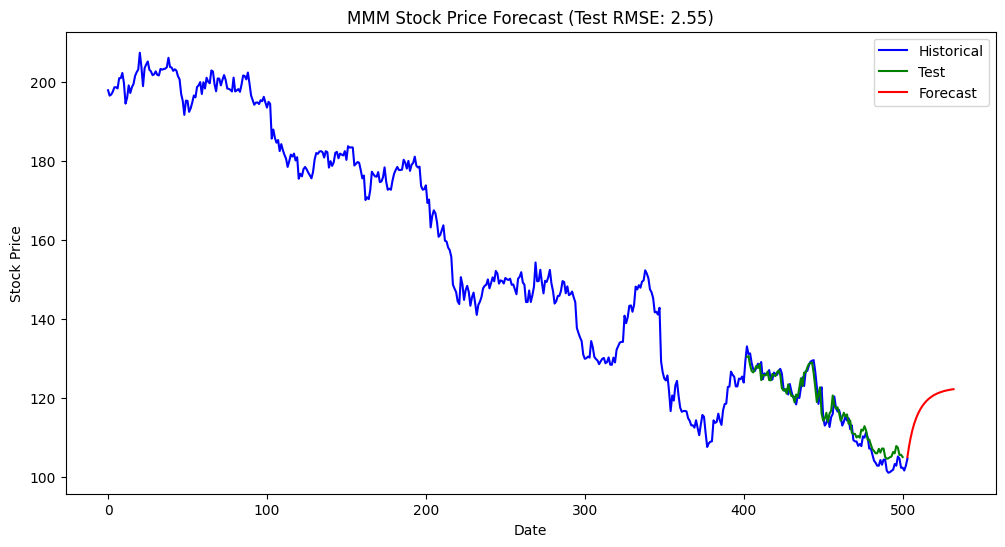

Epoch 1/10
401/401 - 3s - loss: 0.0619 - 3s/epoch - 7ms/step
Epoch 2/10
401/401 - 1s - loss: 0.0142 - 1s/epoch - 3ms/step
Epoch 3/10
401/401 - 1s - loss: 0.0061 - 1s/epoch - 3ms/step
Epoch 4/10
401/401 - 1s - loss: 0.0022 - 1s/epoch - 3ms/step
Epoch 5/10
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 6/10
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 7/10
401/401 - 2s - loss: 0.0011 - 2s/epoch - 4ms/step
Epoch 8/10
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 9/10
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 10/10
401/401 - 1s - loss: 0.0011 - 1s/epoch - 4ms/step
4/4 [==============================] - 0s 4ms/step


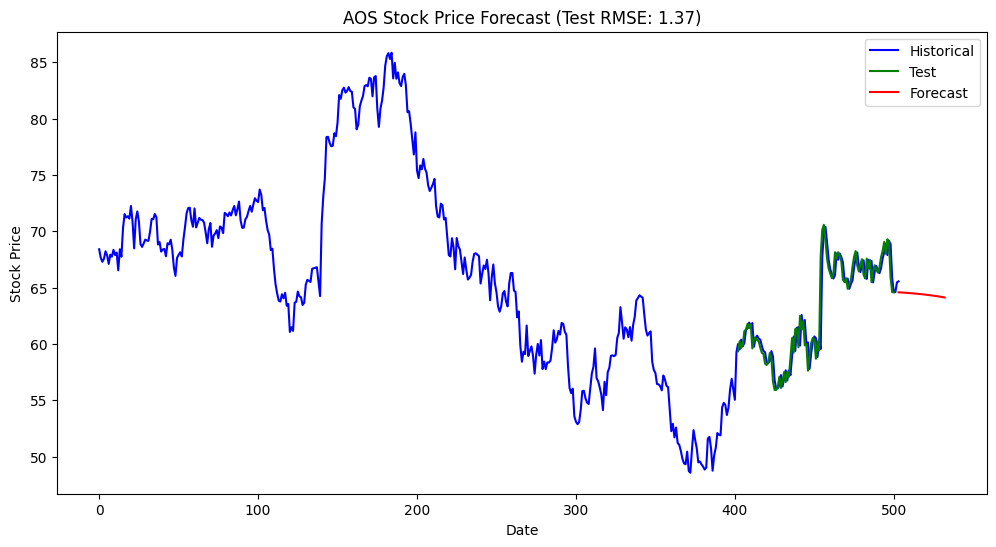

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7f440317ec10>
Traceback (most recent call last):
  File "/usr/lib/python3.9/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


Epoch 1/10
401/401 - 3s - loss: 0.1031 - 3s/epoch - 8ms/step
Epoch 2/10
401/401 - 2s - loss: 0.0250 - 2s/epoch - 4ms/step
Epoch 3/10
401/401 - 1s - loss: 0.0170 - 1s/epoch - 3ms/step
Epoch 4/10
401/401 - 1s - loss: 0.0103 - 1s/epoch - 3ms/step
Epoch 5/10
401/401 - 1s - loss: 0.0055 - 1s/epoch - 3ms/step
Epoch 6/10
401/401 - 2s - loss: 0.0028 - 2s/epoch - 4ms/step
Epoch 7/10
401/401 - 1s - loss: 0.0018 - 1s/epoch - 3ms/step
Epoch 8/10
401/401 - 1s - loss: 0.0016 - 1s/epoch - 3ms/step
Epoch 9/10
401/401 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 10/10
401/401 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
4/4 [==============================] - 0s 4ms/step


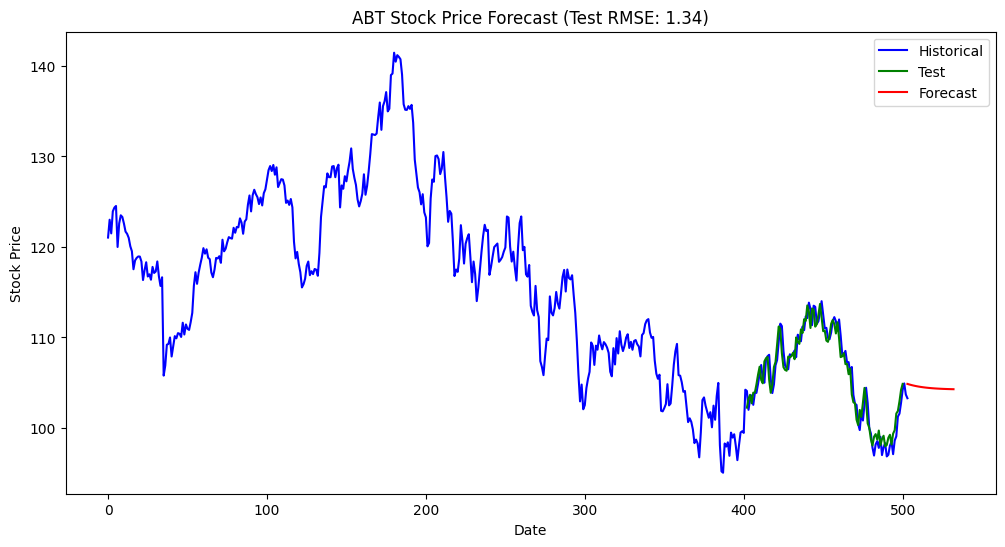

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def forecast_stock_price(ticker, stocks_df):
    # Convert the datetime column to datetime and sort by date
    stocks_df['datetime'] = pd.to_datetime(stocks_df['datetime'])
    stocks_df = stocks_df.sort_values(by='datetime')

    stock_data = stocks_df[stocks_df['ticker'] == ticker]['close']
    stock_data.index = stocks_df[stocks_df['ticker'] == ticker]['datetime']
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data = np.reshape(stock_data.values, (-1, 1))
    stock_data = scaler.fit_transform(stock_data)
    
    # Split the data into training and testing sets
    train_size = int(len(stock_data) * 0.8)
    train, test = stock_data[:train_size, :], stock_data[train_size:, :]
    
    # Reshape the data into X=t and Y=t+1
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # Reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
    
    # Forecast the stock prices for the next 30 days
    future_forecast = []
    current_prediction = testX[-1]
    
    for i in range(30):
        prediction = model.predict(np.reshape(current_prediction, (1, 1, look_back)))
        future_forecast.append(prediction[0, 0])
        current_prediction = np.append(current_prediction[1:], prediction)
    
    future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    # Calculate root mean squared error
    testScore = sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
    
    # Plot historical, test, and forecasted stock prices
    plt.figure(figsize=(12, 6))
    plt.plot(scaler.inverse_transform(stock_data), label='Historical', color='blue')
    plt.plot(range(len(trainPredict) + look_back, len(trainPredict) + len(testPredict) + look_back), testPredict, label='Test', color='green')
    plt.plot(range(len(stock_data) - 1, len(stock_data) + 29), future_forecast, label='Forecast', color='red')
    plt.legend()
    plt.title(f'{ticker} Stock Price Forecast (Test RMSE: {testScore:.2f})')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.show()

    return future_forecast

# Assuming stocks_df is the DataFrame with historical stock data for 2 years for 500 tickers
forecasts = {}

for ticker in stocks_df['ticker'].unique():
    forecasts[ticker] = forecast_stock_price(ticker, stocks_df)


Epoch 1/20
401/401 - 3s - loss: 0.1792 - 3s/epoch - 8ms/step
Epoch 2/20
401/401 - 1s - loss: 0.0352 - 1s/epoch - 3ms/step
Epoch 3/20
401/401 - 1s - loss: 0.0243 - 1s/epoch - 3ms/step
Epoch 4/20
401/401 - 1s - loss: 0.0145 - 1s/epoch - 3ms/step
Epoch 5/20
401/401 - 1s - loss: 0.0070 - 1s/epoch - 4ms/step
Epoch 6/20
401/401 - 1s - loss: 0.0027 - 1s/epoch - 3ms/step
Epoch 7/20
401/401 - 1s - loss: 9.8007e-04 - 1s/epoch - 3ms/step
Epoch 8/20
401/401 - 1s - loss: 5.7612e-04 - 1s/epoch - 3ms/step
Epoch 9/20
401/401 - 1s - loss: 5.3849e-04 - 1s/epoch - 3ms/step
Epoch 10/20
401/401 - 1s - loss: 5.3438e-04 - 1s/epoch - 3ms/step
Epoch 11/20
401/401 - 1s - loss: 5.1759e-04 - 1s/epoch - 3ms/step
Epoch 12/20
401/401 - 1s - loss: 5.2207e-04 - 1s/epoch - 3ms/step
Epoch 13/20
401/401 - 1s - loss: 5.3640e-04 - 1s/epoch - 3ms/step
Epoch 14/20
401/401 - 1s - loss: 5.1282e-04 - 1s/epoch - 3ms/step
Epoch 15/20
401/401 - 1s - loss: 5.1902e-04 - 1s/epoch - 4ms/step
Epoch 16/20
401/401 - 1s - loss: 5.2985e-04

<ipython-input-20-11443e383512>:77: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=30, closed='right')


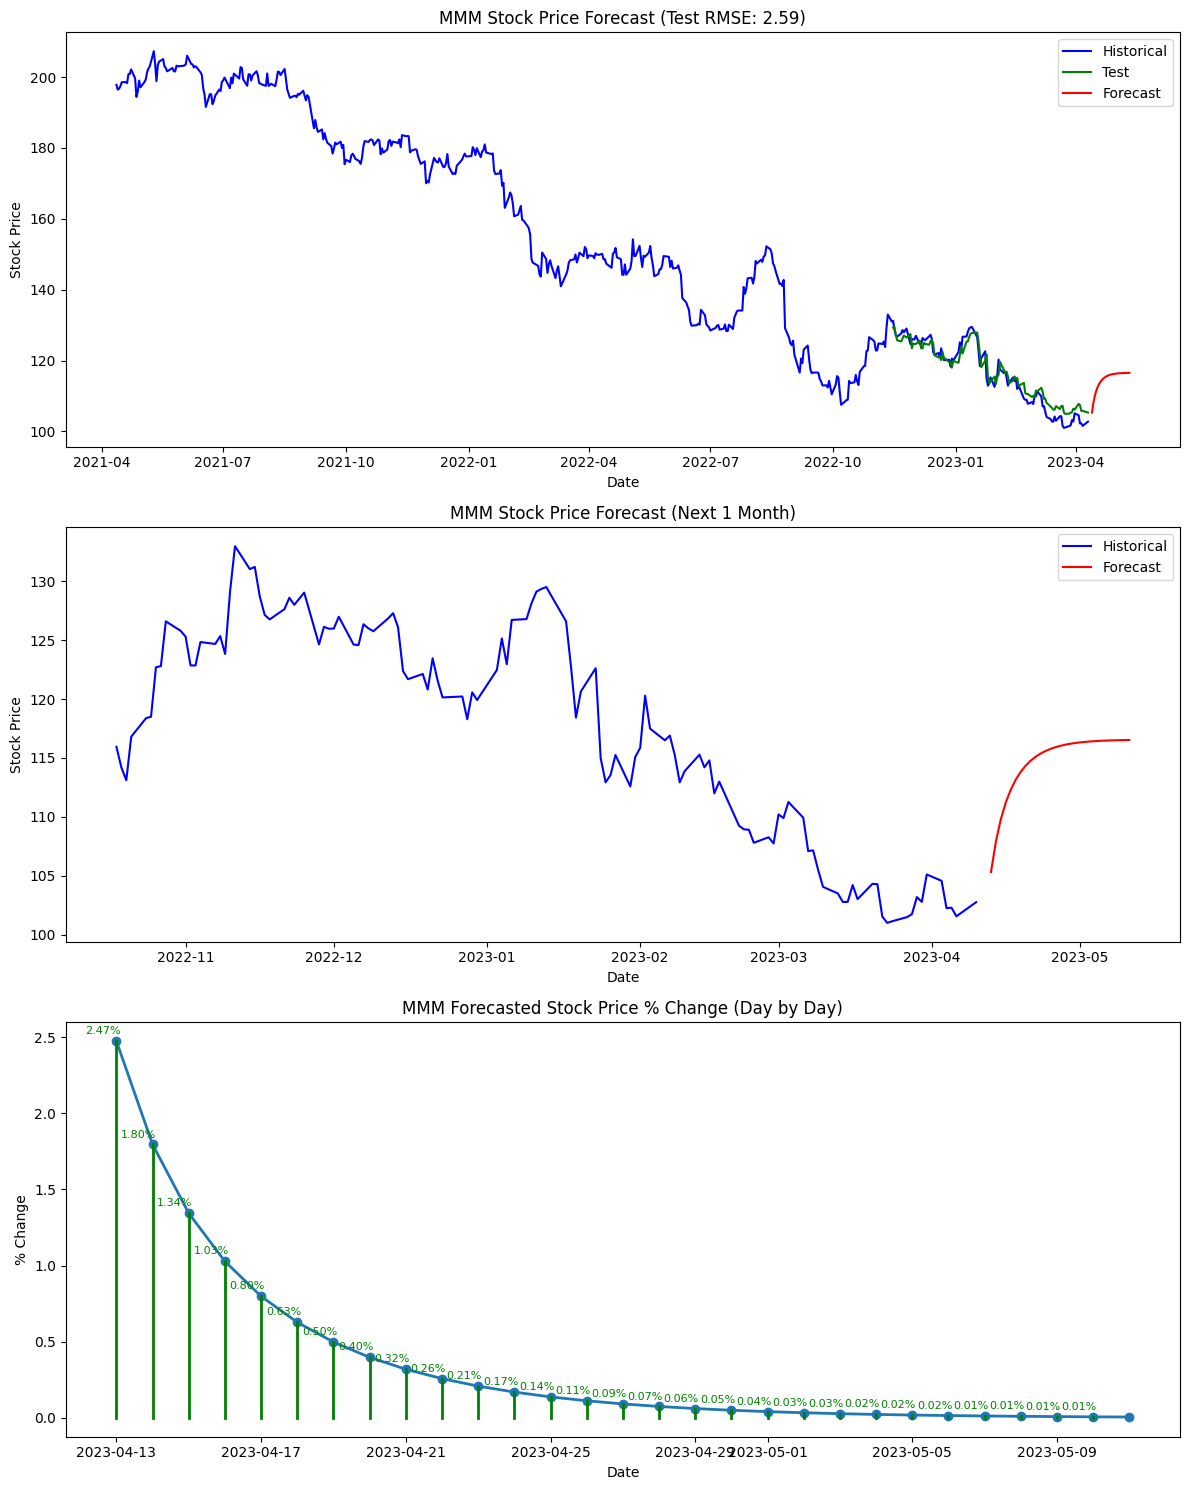

Epoch 1/20
401/401 - 4s - loss: 0.0714 - 4s/epoch - 9ms/step
Epoch 2/20
401/401 - 1s - loss: 0.0166 - 1s/epoch - 3ms/step
Epoch 3/20
401/401 - 1s - loss: 0.0081 - 1s/epoch - 3ms/step
Epoch 4/20
401/401 - 1s - loss: 0.0031 - 1s/epoch - 3ms/step
Epoch 5/20
401/401 - 1s - loss: 0.0014 - 1s/epoch - 3ms/step
Epoch 6/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 7/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 8/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 9/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 10/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 11/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 4ms/step
Epoch 12/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 13/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 14/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 15/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 16/20
401/401 - 1s - loss: 0.0011 - 1s/epoch - 3ms/step
Epoch 17/20
401/4

<ipython-input-20-11443e383512>:77: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=30, closed='right')


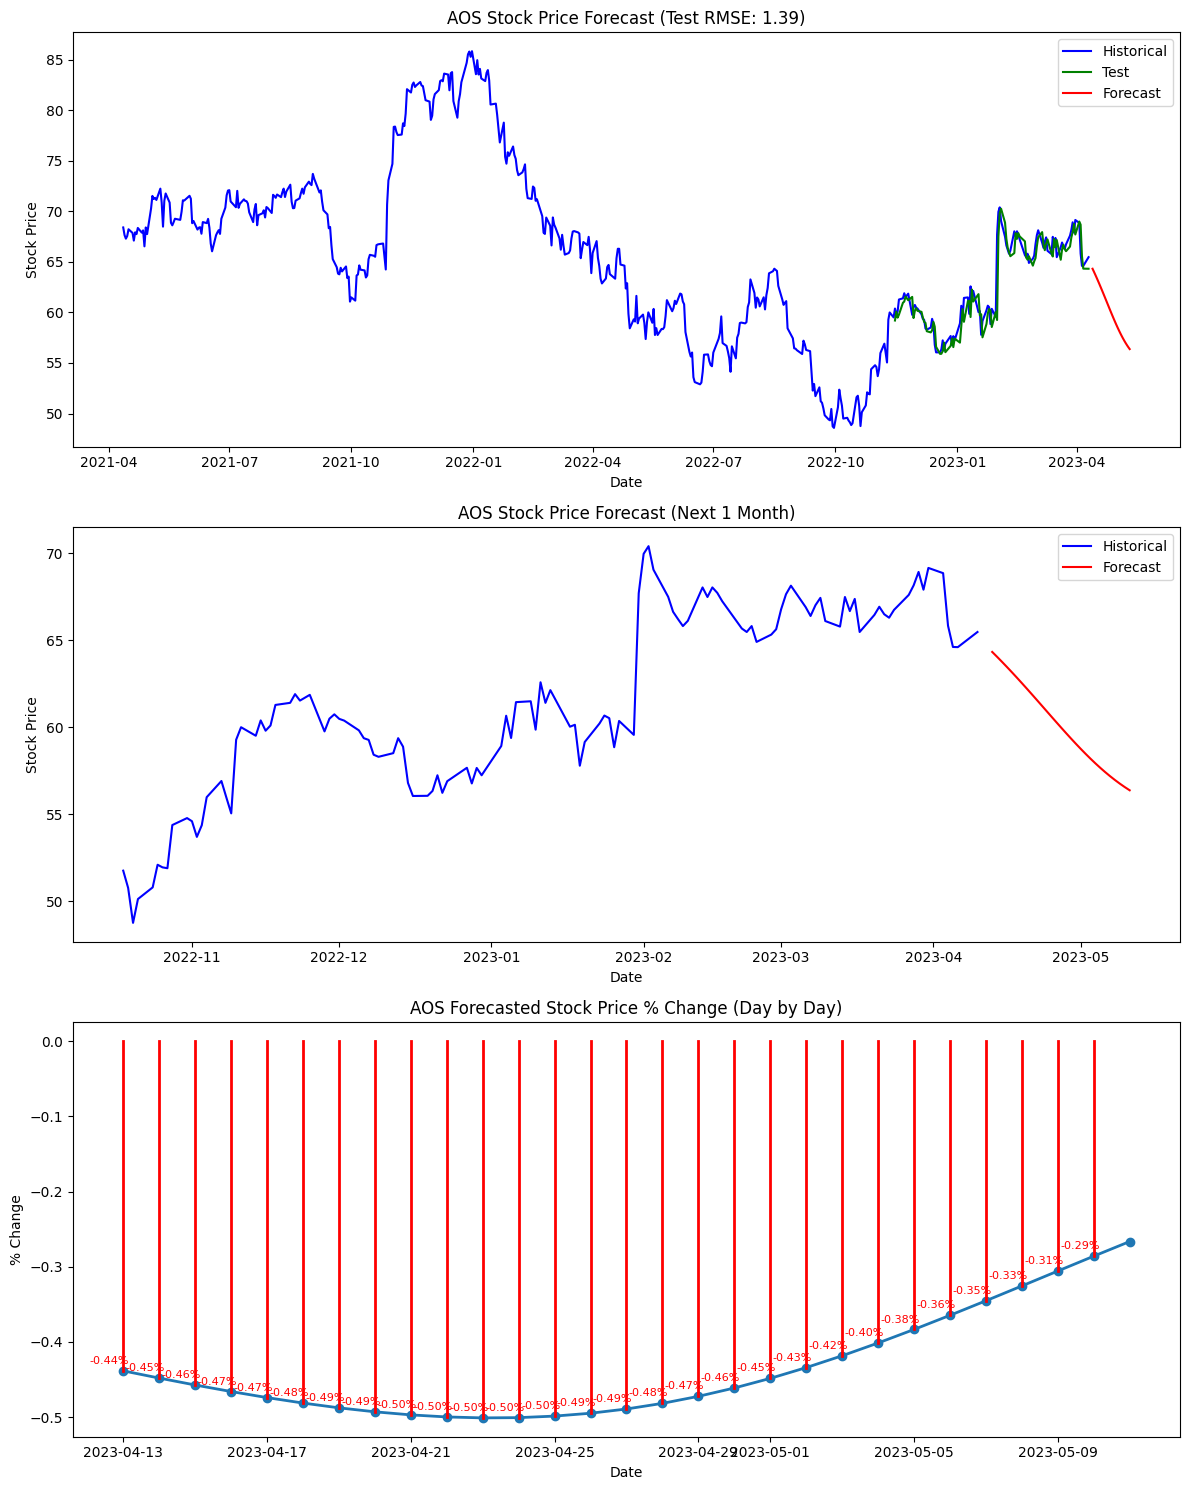

Epoch 1/20
401/401 - 3s - loss: 0.0461 - 3s/epoch - 9ms/step
Epoch 2/20
401/401 - 1s - loss: 0.0102 - 1s/epoch - 3ms/step
Epoch 3/20
401/401 - 1s - loss: 0.0054 - 1s/epoch - 3ms/step
Epoch 4/20
401/401 - 1s - loss: 0.0027 - 1s/epoch - 3ms/step
Epoch 5/20
401/401 - 1s - loss: 0.0017 - 1s/epoch - 3ms/step
Epoch 6/20
401/401 - 1s - loss: 0.0016 - 1s/epoch - 3ms/step
Epoch 7/20
401/401 - 1s - loss: 0.0015 - 1s/epoch - 4ms/step
Epoch 8/20
401/401 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 9/20
401/401 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 10/20
401/401 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 11/20
401/401 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 12/20
401/401 - 1s - loss: 0.0016 - 1s/epoch - 3ms/step
Epoch 13/20
401/401 - 1s - loss: 0.0015 - 1s/epoch - 3ms/step
Epoch 14/20
401/401 - 1s - loss: 0.0016 - 1s/epoch - 3ms/step
Epoch 15/20
401/401 - 1s - loss: 0.0016 - 1s/epoch - 3ms/step
Epoch 16/20
401/401 - 1s - loss: 0.0016 - 1s/epoch - 3ms/step
Epoch 17/20
401/4

<ipython-input-20-11443e383512>:77: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=30, closed='right')


KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import timedelta
from statsmodels.tsa.arima_model import ARIMA

def create_dataset(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def forecast_stock_price(ticker, stocks_df):
    stocks_df['datetime'] = pd.to_datetime(stocks_df['datetime'])
    stocks_df = stocks_df.sort_values(by='datetime')

    stock_data = stocks_df[stocks_df['ticker'] == ticker]['close']
    stock_data.index = stocks_df[stocks_df['ticker'] == ticker]['datetime']
    stock_dates = stocks_df[stocks_df['ticker'] == ticker]['datetime']
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data = np.reshape(stock_data.values, (-1, 1))
    stock_data = scaler.fit_transform(stock_data)
    
    train_size = int(len(stock_data) * 0.8)
    train, test = stock_data[:train_size, :], stock_data[train_size:, :]
    
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    
    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
    
    # Forecast the stock prices for the next 30 days
    future_forecast = []
    current_prediction = testX[-1]
    
    for i in range(30):
        prediction = model.predict(np.reshape(current_prediction, (1, 1, look_back)))
        future_forecast.append(prediction[0, 0])
        current_prediction = np.append(current_prediction[1:], prediction)
    
    future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    # Calculate root mean squared error
    testScore = sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
    pct_change = np.diff(future_forecast.reshape(1, -1)) / future_forecast[:-1] * 100
    pct_change_colors = ['green' if change >= 0 else 'red' for change in pct_change[0]]
    future_forecast=future_forecast[:-1]
    last_date = stock_dates.iloc[-1]
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=30, closed='right')
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    ax1.plot(stock_dates[:-1], scaler.inverse_transform(stock_data[:-1]), label='Historical', color='blue')
    ax1.plot(stock_dates[train_size + look_back:-1], testPredict, label='Test', color='green')
    ax1.plot(future_dates, future_forecast, label='Forecast', color='red')
    ax1.legend()
    ax1.set_title(f'{ticker} Stock Price Forecast (Test RMSE: {testScore:.2f})')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    
    ax2.plot(stock_dates[-120:-1], scaler.inverse_transform(stock_data)[-120:-1], label='Historical', color='blue')
    ax2.plot(future_dates, future_forecast, label='Forecast', color='red')
    ax2.legend()
    ax2.set_title(f'{ticker} Stock Price Forecast (Next 1 Month)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Stock Price')

# ... rest of the code

    # ... rest of the code

    ax3.plot(future_dates, pct_change[0], marker='o', linestyle='-', linewidth=2, markersize=6)
    for i, (date, change) in enumerate(zip(future_dates[:-1], pct_change[0])):
        color = 'green' if change >= 0 else 'red'
        ax3.plot([date, date], [0, change], color=color, linestyle='-', linewidth=2)
        ax3.annotate(f'{change:.2f}%', (date, change), textcoords="offset points", xytext=(-10, 5), ha='center', fontsize=8, color=color)

    ax3.set_title(f'{ticker} Forecasted Stock Price % Change (Day by Day)')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('% Change')


    plt.tight_layout()
    plt.show()

    return future_forecast

# Assuming stocks_df is the DataFrame with historical stock data for 2 years for 500 tickers
forecasts = {}

for ticker in stocks_df['ticker'].unique():
    forecasts[ticker] = forecast_stock_price(ticker, stocks_df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import timedelta
from statsmodels.tsa.arima_model import ARIMA

def create_dataset(dataset, look_back=10):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def forecast_stock_price(ticker, stocks_df):
    stocks_df['datetime'] = pd.to_datetime(stocks_df['datetime'])
    stocks_df = stocks_df.sort_values(by='datetime')

    stock_data = stocks_df[stocks_df['ticker'] == ticker]['close']
    stock_data.index = stocks_df[stocks_df['ticker'] == ticker]['datetime']
    stock_dates = stocks_df[stocks_df['ticker'] == ticker]['datetime']
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data = np.reshape(stock_data.values, (-1, 1))
    stock_data = scaler.fit_transform(stock_data)
    
    train_size = int(len(stock_data) * 0.8)
    train, test = stock_data[:train_size, :], stock_data[train_size:, :]
    
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    
    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
    
    # Forecast the stock prices for the next 30 days
    future_forecast = []
    current_prediction = testX[-1]
    
    for i in range(30):
        prediction = model.predict(np.reshape(current_prediction, (1, 1, look_back)))
        future_forecast.append(prediction[0, 0])
        current_prediction = np.append(current_prediction[1:], prediction)
    
    future_forecast = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    # Calculate root mean squared error
    testScore = sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
    pct_change = np.diff(future_forecast.reshape(1, -1)) / future_forecast[:-1] * 100
    pct_change_colors = ['green' if change >= 0 else 'red' for change in pct_change[0]]
    
    last_date = stock_dates.iloc[-1]
    future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=30, closed='right')

        # Create a subplot with 3 rows and 1 column
    fig = sp.make_subplots(rows=3, cols=1, vertical_spacing=0.1,
                          subplot_titles=(f'{ticker} Stock Price Forecast (Test RMSE: {testScore:.2f})',
                                          f'{ticker} Stock Price Forecast (Next 1 Month)',
                                          f'{ticker} Forecasted Stock Price % Change (Day by Day)'))

    # First plot
    fig.add_trace(go.Scatter(x=stock_dates[:-1], y=scaler.inverse_transform(stock_data[:-1]).squeeze(),
                            mode='lines', name='Historical', line=dict(color='blue')), row=1, col=1)
    fig.add_trace(go.Scatter(x=stock_dates[train_size + look_back:-1], y=testPredict.squeeze(),
                            mode='lines', name='Test', line=dict(color='green')), row=1, col=1)
    fig.add_trace(go.Scatter(x=future_dates, y=future_forecast.squeeze(),
                            mode='lines', name='Forecast', line=dict(color='red')), row=1, col=1)

    # Second plot
    fig.add_trace(go.Scatter(x=stock_dates[-120:-1], y=scaler.inverse_transform(stock_data)[-120:-1].squeeze(),
                            mode='lines', name='Historical', line=dict(color='blue')), row=2, col=1)
    fig.add_trace(go.Scatter(x=future_dates, y=future_forecast.squeeze(),
                            mode='lines', name='Forecast', line=dict(color='red')), row=2, col=1)

    # Third plot
    fig.add_trace(go.Scatter(x=future_dates[:-1], y=pct_change[0], mode='markers+lines',
                            marker=dict(size=6, color=pct_change_colors),
                            line=dict(width=2), showlegend=False), row=3, col=1)

    for date, change, color in zip(future_dates[:-1], pct_change[0], pct_change_colors):
        fig.add_annotation(x=date, y=change, text=f'{change:.2f}%', showarrow=False,
                          font=dict(size=8, color=color), yref='y3', xref='x3', ay=5)

    # Update axis labels
    fig.update_xaxes(title_text='Date', row=1, col=1)
    fig.update_xaxes(title_text='Date', row=2, col=1)
    fig.update_xaxes(title_text='Date', row=3, col=1)
    fig.update_yaxes(title_text='Stock Price', row=1, col=1)
    fig.update_yaxes(title_text='Stock Price', row=2, col=1)
    fig.update_yaxes(title_text='% Change', row=3, col=1)

    # Show the plot
    fig.show()

    # Save the chart as an HTML file
    fig.write_html('stock_forecast.html', auto_open=True)

    return future_forecast

# Assuming stocks_df is the DataFrame with historical stock data for 2 years for 500 tickers
forecasts = forecast_stock_price('AMZN', stocks_df)


Epoch 1/20
401/401 - 3s - loss: 0.1019 - 3s/epoch - 8ms/step
Epoch 2/20
401/401 - 1s - loss: 0.0152 - 1s/epoch - 3ms/step
Epoch 3/20
401/401 - 1s - loss: 0.0091 - 1s/epoch - 3ms/step
Epoch 4/20
401/401 - 1s - loss: 0.0045 - 1s/epoch - 3ms/step
Epoch 5/20
401/401 - 1s - loss: 0.0021 - 1s/epoch - 3ms/step
Epoch 6/20
401/401 - 2s - loss: 0.0014 - 2s/epoch - 4ms/step
Epoch 7/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 8/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 9/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 10/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 11/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 12/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 13/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 14/20
401/401 - 1s - loss: 0.0012 - 1s/epoch - 3ms/step
Epoch 15/20
401/401 - 1s - loss: 0.0013 - 1s/epoch - 3ms/step
Epoch 16/20
401/401 - 2s - loss: 0.0013 - 2s/epoch - 4ms/step
Epoch 17/20
401/4

<ipython-input-32-0f8ba955dbb9>:77: FutureWarning:

Argument `closed` is deprecated in favor of `inclusive`.



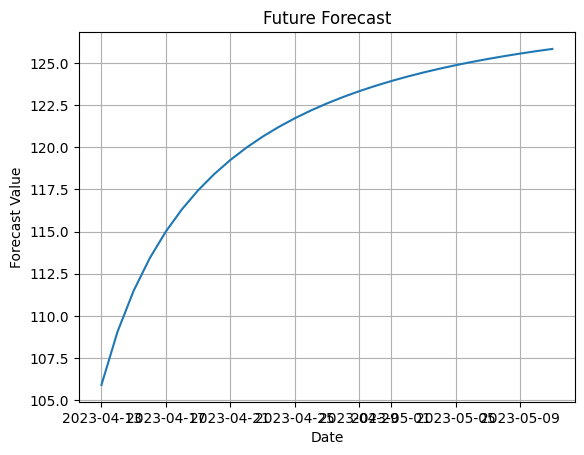

In [ ]:
plt.plot(future_dates, future_forecast)
plt.xlabel('Date')
plt.ylabel('Forecast Value')
plt.title('Future Forecast')
plt.grid()
plt.show()
